In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp

In [11]:
import zipfile

# 폴더 생성
original_base_dir = '/Users/민동률/DL/data/datasets'
os.mkdir(original_base_dir)

# 압축 해제
dataset_zip = zipfile.ZipFile('/Users/민동률/DL/data/test1.zip')
dataset_zip.extractall(original_base_dir)
dataset_zip.close()

dataset_zip = zipfile.ZipFile('/Users/민동률/DL/data/train.zip')
dataset_zip.extractall(original_base_dir)
dataset_zip.close()

In [12]:
import shutil

# 폴더 생성
original_dataset_dir = '/Users/민동률/DL/data/datasets/train'
base_dir = '/Users/민동률/DL/data/datasets_small'
os.mkdir(base_dir)

train_dir = osp.join(base_dir, 'train')
os.mkdir(train_dir)
val_dir = osp.join(base_dir, 'val')
os.mkdir(val_dir)
test_dir = osp.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = osp.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = osp.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

val_cats_dir = osp.join(val_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = osp.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

test_cats_dir = osp.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = osp.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [14]:
# 고양이 학습 데이터 1000
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 검증 데이터 500 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)

# 테스트 데이터 500 
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
# 강아지 학습 데이터 1000
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for idx, fname in enumerate(fnames) :
    src = osp.join(original_dataset_dir, f'dog.{idx}.jpg')
    dst = osp.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 검증 데이터 500
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 테스트 데이터 500 
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
# 분할된 데이터의 수 출력
print("고양이 데이터셋")
print("train :", len(os.listdir(train_cats_dir)))
print("test :", len(os.listdir(test_cats_dir)))
print("val :", len(os.listdir(val_cats_dir)))
print()
print("강아지 데이터셋")
print("train :", len(os.listdir(train_dogs_dir)))
print("test :", len(os.listdir(test_dogs_dir)))
print("val :", len(os.listdir(val_dogs_dir)))

고양이 데이터셋
train : 1000
test : 500
val : 500

강아지 데이터셋
train : 1000
test : 500
val : 500


### 1. 네트워크 구축하기
      - (Conv2D + Maxpooling2D)3 + Conv2D + Dense2 입력크기 : 150 x 150

In [26]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3))) 
# Conv2D : 이미지이기에
# 필터 : 32
# kernel size : 3
# activation : 활성화함수
# input_shape : 150, 150, 3(너비, 높이, 채널(여기서는 컬러이기에 3))
# (3, 3) -> kernel_size ([3, 3] or 3, (3,3) 가능)
model.add(layers.MaxPooling2D((2,2))) # 2x2로 pooling
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten()) # 1차원 벡터로 나열하기 위함
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [28]:
# 모델의 훈련 설정하기
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), # lr : learnint rate 설정
              loss='binary_crossentropy',
              metrics=['accuracy'])# 최적화, 손실함수, 성능평가지표

### 데이터 전처리 
    1. 사진 파일 읽기
    2. JEPG 콘텐츠를 RGB픽셀 값으로 디코딩
    3. 부동 소수 타입의 텐서로 변환
    4. 픽셀 값 (0~255)의 스케일을 [0,1]로 조정

keras.preprocessing.image 라이브러리 사용
- ImageDataGenerator 클래스 : 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꿔주는 파이썬 generator을 만들어줌

cf. 파이썬 generator 반복자(iterator)처럼 작동하는 객체로 for .. in 연산자에 사용할 수 있다.

In [29]:
# ImageDataGenerator를 사용하여 디렉토리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # -> 픽셀 값(0~255)의 스케일을 [0, 1]로 조정
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타겟 디렉토리
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


150x150 이미지 x 20개(batch_size) = 하나의 미니배치 → 크기 : (20,150,150,3)

이진 레이블 배치 → 크기 : (20,)

In [30]:
# generator가 생성하는 훈련 데이터와 레이블의 미니배치 크기 확인하기
for data_batch, labels_batch in train_generator :
    print(data_batch.shape) # 배치 높이 너비 channel
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


##### fit_generator(지금은 fit 사용을 추천)
fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

- generator : 입력과 타겟의 배치를 끝없이 반환하는 파이썬 제너레이터를 첫번째 변수로 입력
- steps_per_epoch :
하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 지정
steps_per_epoch 갯수만큼 generator로부터 미니배치를 뽑은 다음 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행한 후 다음 에포크로 넘어감
여기서는 20개의 샘플이 하나의 미니 배치이고 전체 2000개의 샘플이 있으므로 steps_per_epoch를 100으로 지정
- validation_data :
데이터 제너레이터 혹은 넘파이 배열의 튜플
데이터 제너레이터를 사용하는 경우 검증 데이터의 배치를 끝없이 반환하므로 얼마나 많은 배치를 추출하여 평가할지 validation_steps 변수에 지정

##### Q. 기존에는 fit(x,y, batch_size, epoch)만을 지정해주었다. 즉 generator를 사용하지는 않았는데 이번에 사용하는 이유가 뭘까?
A. 데이터 전체를 로딩해줄 필요 없이 그때그때 필요한 배치 사이즈 만큼의 데이터만 불러들이기 위해서 generator를 사용한다.

##### Q. steps_per_epoch/epoch이 헷갈린다.
A. 기존에는 ImageDateGenerator 없이 전체 훈련데이터를 메모리에 올려놓고 배치 사이즈만 지정해서 끌어와썼다. 전체 훈련데이터의 샘플 수를 알기 때문에 한 epoch당 미니 배치를 몇번 추출해야하는지 알 수 있었다.
예를 들어 MNIST 데이터셋은 훈련 데이터가 60000개 있고 배치 사이즈를 64개로 지정할 경우 6000//64개를 한 epoch으로 정의하면 되었다.

그런데 전체 훈련 데이터가 너무 클 경우에는 ImageDataGenerator는 사용해야한다. ImageDataGenerator는 지정한 크기의 미니배치를 끝없이/랜덤으로 반환한다. (바로 위의 셀에 break를 제거하고 수행해보면 알 수 있다.) 따라서 한 epoch을 몇 번의 미니배치로 정의할 것인가가 중요하고 이를 steps_per_epoch라는 변수에 지정해준다. Cats&Dogs 예제와 같이 (전체 데이터셋 샘플 수/미니 배치 수)로 계산하는 것이 일반적인 것 같다.

iteration/epoch/batch_size 개념이 헷갈린다면 https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8 를 보자.

In [32]:
# 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit(
    train_generator, 
    steps_per_epoch=100,
    epochs=30, 
    validation_data= val_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 45s 452ms/step - loss: 0.6929 - accuracy: 0.5305 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 38s 383ms/step - loss: 0.6837 - accuracy: 0.5735 - val_loss: 0.6791 - val_accuracy: 0.5210
Epoch 3/30
100/100 [==============================] - 39s 389ms/step - loss: 0.6386 - accuracy: 0.6485 - val_loss: 0.5985 - val_accuracy: 0.6700
Epoch 4/30
100/100 [==============================] - 39s 392ms/step - loss: 0.5851 - accuracy: 0.6880 - val_loss: 0.5849 - val_accuracy: 0.6810
Epoch 5/30
100/100 [==============================] - 39s 389ms/step - loss: 0.5367 - accuracy: 0.7360 - val_loss: 0.5653 - val_accuracy: 0.7060
Epoch 6/30
100/100 [==============================] - 38s 381ms/step - loss: 0.4759 - accuracy: 0.7650 - val_loss: 0.5889 - val_accuracy: 0.7050
Epoch 7/30
100/100 [==============================] - 38s 383ms/step - loss: 0.4378 - accuracy: 0.7920 - val_loss: 0.5450 - val_ac

In [ ]:
# 모델 저장하기
model.save('./cats_and_dogs_small_1.h5')

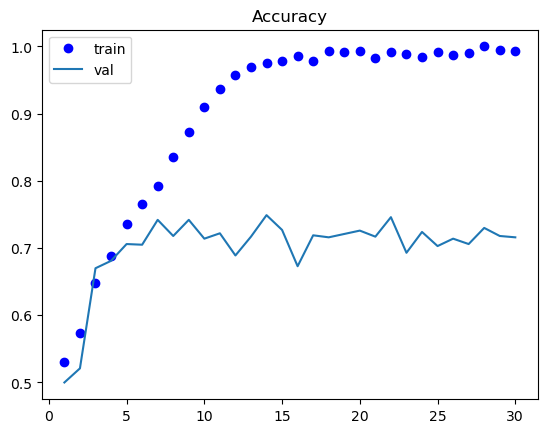

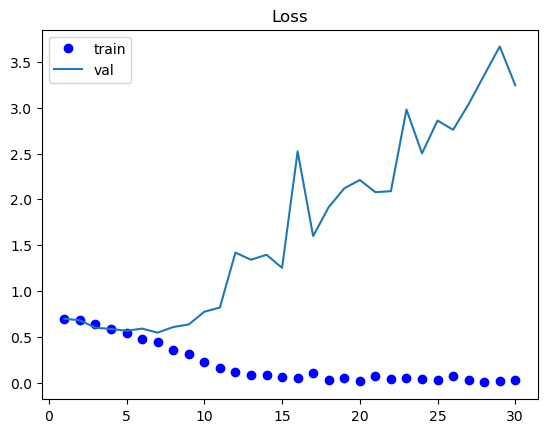

In [33]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt
import numpy as np

def history_plot(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = np.arange(1, len(acc)+1)
    plt.plot(epochs, acc,'bo', label='train')
    plt.plot(epochs, val_acc, label='val')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='train')
    plt.plot(epochs, val_loss, label='val')
    plt.title('Loss')
    plt.legend()
    plt.show()

history_plot(history.history)

### 2